Text(0.5, 1.0, 'D2')

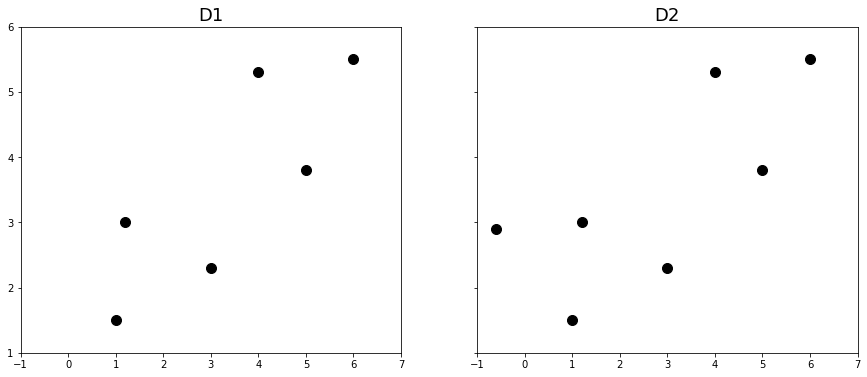

In [2]:
import numpy as np
import matplotlib.pyplot as plt

D1 = np.array([[1.0, 1.2, 3, 4, 5, 6],
              [1.5, 3, 2.3, 5.3, 3.8, 5.5]])
D2 = np.array([[-0.6, 1.0, 1.2, 3, 4, 5, 6],
              [2.9, 1.5, 3, 2.3, 5.3, 3.8, 5.5]])

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches((15,6))

ax1.plot(D1[0], D1[1], 'ko', markersize=10)
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.set_title('D1', fontsize=18)

ax2.plot(D2[0], D2[1], 'ko', markersize=10)
ax2.set_xlim([-1,7])
ax2.set_ylim([1,6])
ax2.set_title('D2', fontsize=18)

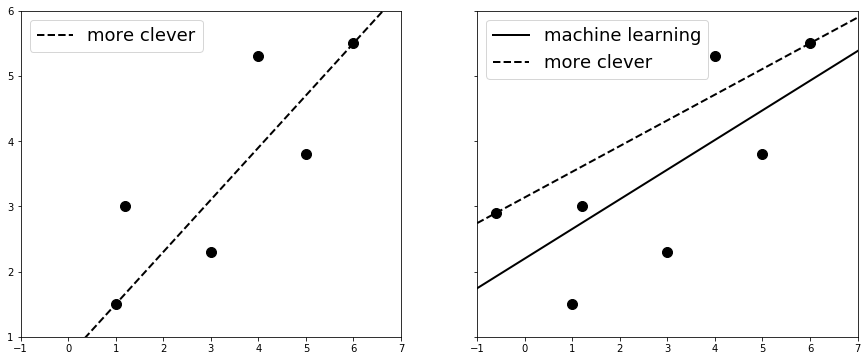

In [5]:
# 최적의 직선을 계산
def machine_learning(D):
    N = D.shape[1]
    X = np.c_[np.ones(N), D[0]]
    y = D[1]
    w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
    return w

# 첫 점과 끝 점을 잇는 방식으로 직선을 계산
def more_clever(D):
    first, last = D[:,0], D[:,-1]
    w1 = (last[1]-first[1]) / (last[0]-first[0])
    w0 = -w1 * first[0] + first[1]
    return (w0, w1)

# 직선을 그릴 때 사용
def f(x, w):
    return w[1]*x + w[0]


w_ml_d1 = machine_learning(D1)
w_mc_d1 = more_clever(D1)

w_ml_d2 = machine_learning(D2)
w_mc_d2 = more_clever(D2)

x = np.linspace(-1, 7, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches((15,6))

ax1.plot(D1[0], D1[1], 'ko', markersize=10)
ax1.plot(x, f(x, w_mc_d1), '--', c='k', lw=2, label='more clever')
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.legend(fontsize=18)

ax2.plot(D2[0], D2[1], 'ko', markersize=10) # ❹
ax2.plot(x, f(x, w_ml_d2), c='k', lw=2, label='machine learning')
ax2.plot(x, f(x, w_mc_d2), '--', c='k', lw=2, label='more clever')
ax2.set_xlim([-1,7])
ax2.set_ylim([1,6])
ax2.legend(fontsize=18)
plt.show()